In [2]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,iplot
import cufflinks as cf

# Manipulating the default plot size
#plt.rcParams['figure.figsize'] = 10, 12
plt.rcParams['figure.figsize']=25,18
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [70]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
import plotly
plotly.__version__


'4.4.1'

## Reading the Datasets


In [12]:
df = pd.read_csv('/content/covid_19_data.csv')


In [11]:
df.head()


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [13]:
df.rename(columns={'Country/Region':'Country'}, inplace=True)


In [14]:
df.rename(columns={'Province/State':'State'}, inplace=True)


In [15]:
df.tail()

,SNo,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
172475,172476,12/06/2020,Zaporizhia Oblast,Ukraine,2020-12-07 05:26:14,36539.0,337.0,6556.0
172476,172477,12/06/2020,Zeeland,Netherlands,2020-12-07 05:26:14,6710.0,104.0,0.0
172477,172478,12/06/2020,Zhejiang,Mainland China,2020-12-07 05:26:14,1295.0,1.0,1288.0
172478,172479,12/06/2020,Zhytomyr Oblast,Ukraine,2020-12-07 05:26:14,31967.0,531.0,22263.0
172479,172480,12/06/2020,Zuid-Holland,Netherlands,2020-12-07 05:26:14,154813.0,2414.0,0.0


# Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172480 entries, 0 to 172479
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              172480 non-null  int64  
 1   ObservationDate  172480 non-null  object 
 2   State            124597 non-null  object 
 3   Country          172480 non-null  object 
 4   Last Update      172480 non-null  object 
 5   Confirmed        172480 non-null  float64
 6   Deaths           172480 non-null  float64
 7   Recovered        172480 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.5+ MB


In [10]:
df.isnull().sum()

SNo                    0
ObservationDate        0
State              47883
Country                0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [11]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,172480.000000,1.724800e+05,172480.000000,1.724800e+05
mean,86240.500000,3.323156e+04,1050.030966,2.102825e+04
std,49790.831552,1.031349e+05,3499.436401,1.156598e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,43120.750000,4.570000e+02,6.000000,1.000000e+01
50%,86240.500000,4.016500e+03,76.000000,8.580000e+02
75%,129360.250000,1.884300e+04,554.000000,7.229000e+03
max,172480.000000,2.290891e+06,54804.000000,5.624444e+06


# Data Visualization

In [ ]:
#df.style.background_gradient(cmap='Reds')

In [16]:
confirmed = df.groupby('ObservationDate').sum()['Confirmed'].reset_index()
confirmed

,ObservationDate,Confirmed
0,01/22/2020,555.0
1,01/23/2020,653.0
2,01/24/2020,941.0
3,01/25/2020,1438.0
4,01/26/2020,2118.0
...,...,...
315,12/02/2020,64530517.0
316,12/03/2020,65221040.0
317,12/04/2020,65899441.0
318,12/05/2020,66540034.0


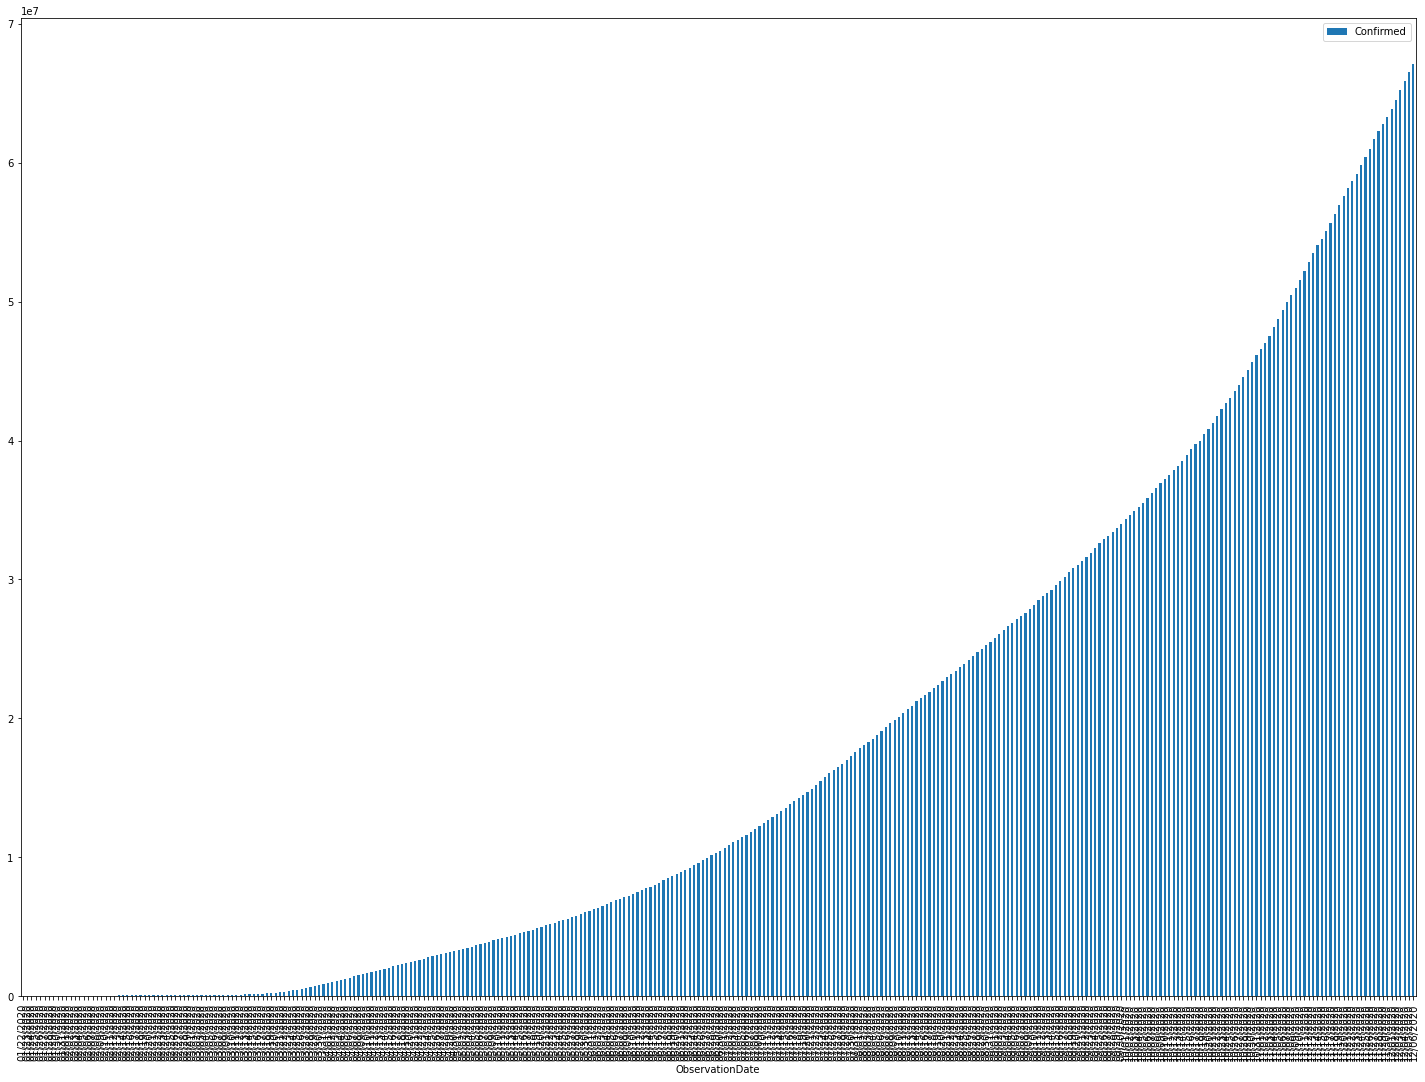

In [17]:
#Pandas vis
confirmed.plot(kind='bar',x='ObservationDate',y='Confirmed')
plt.show()

In [31]:
#Plotly
confirmed.iplot(kind='bar',x='ObservationDate',y='Confirmed',xTitle='ObservationDate',yTitle="Confirmed")

In [32]:
deaths = df.groupby('ObservationDate').sum()['Deaths'].reset_index()
deaths

,ObservationDate,Deaths
0,01/22/2020,17.0
1,01/23/2020,18.0
2,01/24/2020,26.0
3,01/25/2020,42.0
4,01/26/2020,56.0
...,...,...
315,12/02/2020,1493742.0
316,12/03/2020,1506260.0
317,12/04/2020,1518670.0
318,12/05/2020,1528868.0


In [33]:
#Plotly
deaths.iplot(kind='bar',x='ObservationDate',y='Deaths',xTitle='ObservationDate',yTitle="Deaths")

In [68]:
recovered = df.groupby('ObservationDate').sum()['Recovered'].reset_index()
recovered

,ObservationDate,Recovered
0,01/22/2020,28.000
1,01/23/2020,30.000
2,01/24/2020,36.000
3,01/25/2020,39.000
4,01/26/2020,52.000
5,01/27/2020,61.000
6,01/28/2020,107.000
7,01/29/2020,126.000
8,01/30/2020,143.000
9,01/31/2020,222.000


In [71]:
#Plotly
recovered.iplot(kind='bar',x='ObservationDate',y='Recovered',xTitle='ObservationDate',yTitle="Recovered")

# Making the Prediction using FB Prophet

In [21]:
from fbprophet import Prophet

In [22]:
df.head()

,SNo,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [23]:
confirmed = df.groupby('ObservationDate').sum()['Confirmed'].reset_index()
deaths = df.groupby('ObservationDate').sum()['Deaths'].reset_index()
recovered = df.groupby('ObservationDate').sum()['Recovered'].reset_index()

In [24]:
confirmed.tail(10)

,ObservationDate,Confirmed
310,11/27/2020,61687701.0
311,11/28/2020,62286402.0
312,11/29/2020,62773116.0
313,11/30/2020,63279026.0
314,12/01/2020,63883985.0
315,12/02/2020,64530517.0
316,12/03/2020,65221040.0
317,12/04/2020,65899441.0
318,12/05/2020,66540034.0
319,12/06/2020,67073728.0


In [26]:
deaths.tail(10)

,ObservationDate,Deaths
310,11/27/2020,1443110.0
311,11/28/2020,1452852.0
312,11/29/2020,1459771.0
313,11/30/2020,1468458.0
314,12/01/2020,1481306.0
315,12/02/2020,1493742.0
316,12/03/2020,1506260.0
317,12/04/2020,1518670.0
318,12/05/2020,1528868.0
319,12/06/2020,1536056.0


In [27]:
recovered.tail(10)

,ObservationDate,Recovered
310,11/27/2020,39476664.0
311,11/28/2020,39831868.0
312,11/29/2020,40157966.0
313,11/30/2020,40559353.0
314,12/01/2020,41034934.0
315,12/02/2020,41496318.0
316,12/03/2020,41932091.0
317,12/04/2020,42352021.0
318,12/05/2020,42789879.0
319,12/06/2020,43103827.0


The input to Prophet is always a dataframe with two columns: **ds** and **y**. The **ds (datestamp)** column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [28]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [29]:
confirmed.head()

,ds,y
0,2020-01-22,555.0
1,2020-01-23,653.0
2,2020-01-24,941.0
3,2020-01-25,1438.0
4,2020-01-26,2118.0


In [30]:
confirmed.tail()

,ds,y
315,2020-12-02,64530517.0
316,2020-12-03,65221040.0
317,2020-12-04,65899441.0
318,2020-12-05,66540034.0
319,2020-12-06,67073728.0



##4.1 Forecasting Confirmed NCOVID-19 Cases Worldwide with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [31]:
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [44]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=279)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
future.tail()

,ds
594,2021-09-07
595,2021-09-08
596,2021-09-09
597,2021-09-10
598,2021-09-11


The **predict** method will assign each row in future a predicted value which it names **yhat**. If you pass in historical dates, it will provide an in-sample fit. The **forecast object** here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [53]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
589,2021-09-02,200025537.345,151772297.407,250681756.813
590,2021-09-03,200556147.768,152581493.234,251858402.976
591,2021-09-04,201059681.558,153080940.665,251818138.757
592,2021-09-05,201532590.740,152869164.709,253089152.371
593,2021-09-06,201975492.097,153419920.887,253221384.569
594,2021-09-07,202473335.392,153219523.630,254313006.597
595,2021-09-08,202994839.349,154052219.697,255916720.986
596,2021-09-09,203517003.628,154115705.266,256353152.843
597,2021-09-10,204047614.051,154704586.130,256755203.871
598,2021-09-11,204551147.841,154783703.364,257480507.604


You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

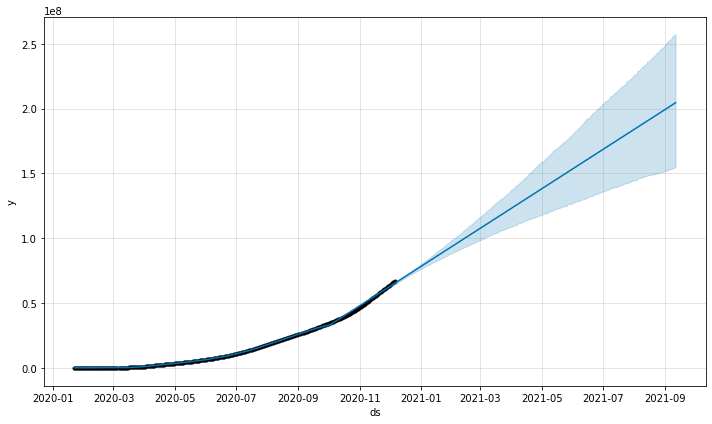

In [54]:
confirmed_forecast_plot = m.plot(forecast)

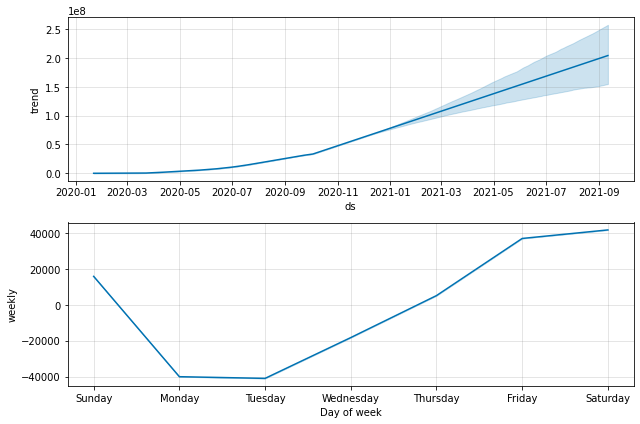

In [55]:
confirmed_forecast_plot =m.plot_components(forecast)

In [56]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [57]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=279)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
594,2021-09-07
595,2021-09-08
596,2021-09-09
597,2021-09-10
598,2021-09-11


In [58]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
589,2021-09-02,3541489.477,2251316.481,4853763.419
590,2021-09-03,3549792.638,2260232.827,4868481.112
591,2021-09-04,3557239.328,2256402.762,4885453.568
592,2021-09-05,3563527.394,2254590.507,4888350.835
593,2021-09-06,3569333.425,2265674.036,4896661.087
594,2021-09-07,3577601.791,2258344.161,4895399.276
595,2021-09-08,3586124.588,2266602.659,4928895.084
596,2021-09-09,3594554.653,2277329.425,4934647.896
597,2021-09-10,3602857.814,2280956.009,4964068.616
598,2021-09-11,3610304.504,2272282.259,4984030.496


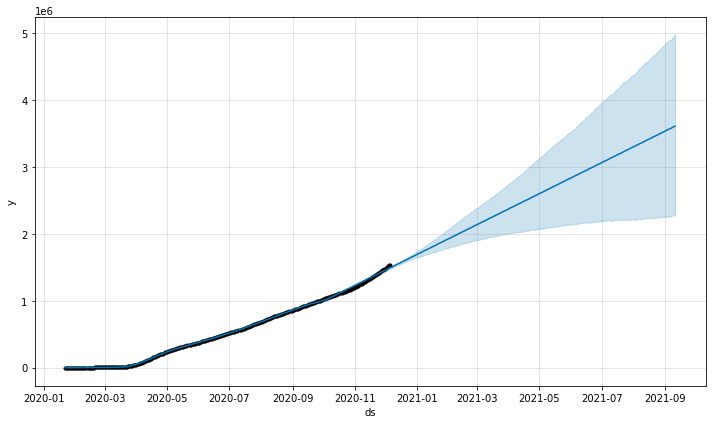

In [59]:
deaths_forecast_plot = m.plot(forecast)

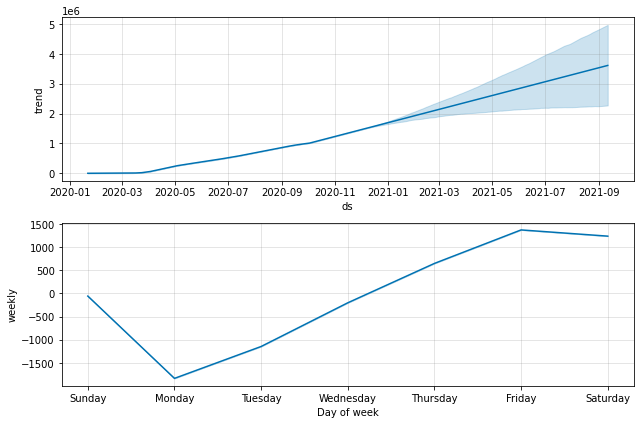

In [60]:
deaths_forecast_plot = m.plot_components(forecast)

##4.3 Forecasting Worldwide Recovered Cases with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [61]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [62]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=279)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
594,2021-09-07
595,2021-09-08
596,2021-09-09
597,2021-09-10
598,2021-09-11


In [63]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
589,2021-09-02,117048260.022,94162415.997,139762898.157
590,2021-09-03,117316425.678,94132630.167,140385082.595
591,2021-09-04,117619640.037,94651234.095,140693998.751
592,2021-09-05,117885589.125,94765178.499,141298483.017
593,2021-09-06,118130340.418,94905622.098,142163458.217
594,2021-09-07,118425297.077,95225052.473,142375809.624
595,2021-09-08,118723782.699,95162507.668,142577459.339
596,2021-09-09,119005770.115,95594076.751,142983743.008
597,2021-09-10,119273935.771,95505437.766,143486747.954
598,2021-09-11,119577150.130,95702819.696,143612650.853


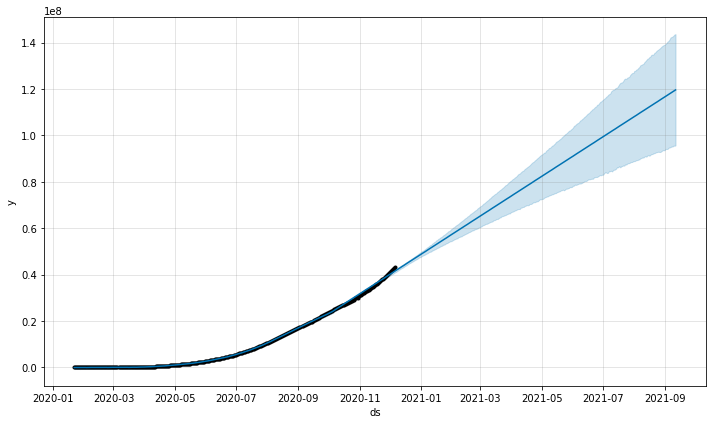

In [65]:
recovered_forecast_plot = m.plot(forecast)

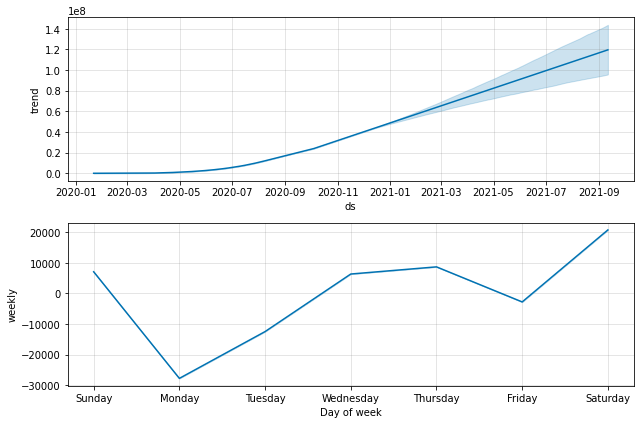

In [64]:
recovered_forecast_plot = m.plot_components(forecast)


#**Data Source:**
- https://www.mohfw.gov.in/
- https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset